In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from maxima import findLocalMaximaMinima
from scipy.signal import argrelextrema
import librosa 
import IPython.display as ipd


In [110]:
#Load a .wav file
# x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\africa-toto.wav')
x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\file_example_WAV_1MG.wav')

print('x length = {}'.format(len(x)))
print('sample rate = {}'.format(sr))
print('sound clip is {} seconds long' .format(int((len(x)/sr))))

x length = 739329
sample rate = 22050
sound clip is 33 seconds long


In [111]:
#np.array of seconds
t = np.array(range(0, len(x))) /sr
print(t)

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 3.35295238e+01
 3.35295692e+01 3.35296145e+01]


Text(0, 0.5, 'Pressure')

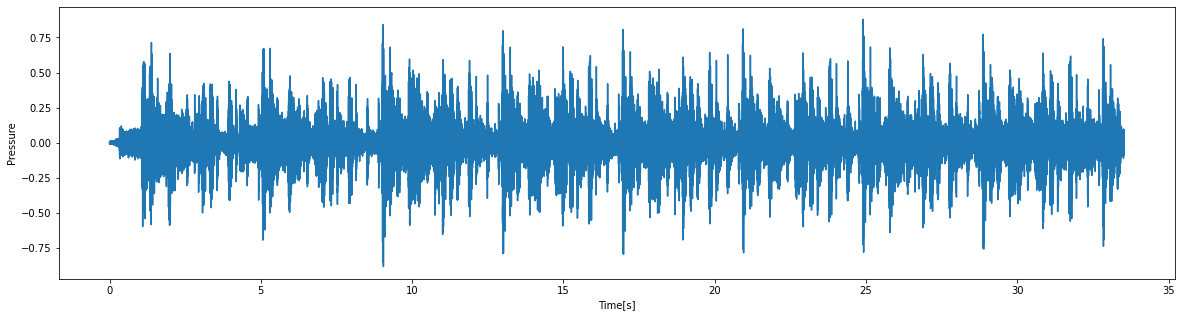

In [112]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('Time[s]')
plt.ylabel('Pressure')

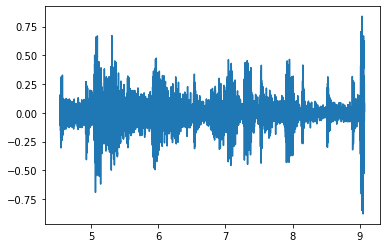

In [113]:
plt.plot(t[100000:200000], x[100000:200000])

In [114]:
#compute the FFT
fhat = np.fft.fft(x)

In [115]:
print("Biggest value in fft {}".format(max(abs(fhat))))
print("Samllest value in fft {}".format(min(abs(fhat))))
print('Median of power {}'.format(np.median(abs(fhat))))

Biggest value in fft 16434.572764024208
Samllest value in fft 0.0008488091711353406
Median of power 0.003860672945007316


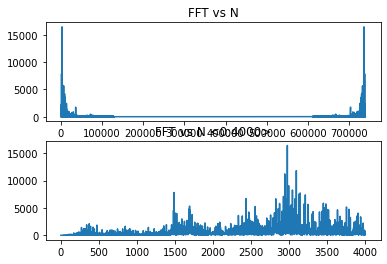

In [116]:
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.title('FFT vs N')
plt.plot(abs(fhat))
plt.sca(axs[1])
plt.title('FFT vs N <0:4000>')
plt.plot(abs(fhat[0:4000]))

Text(0, 0.5, 'Power Db')

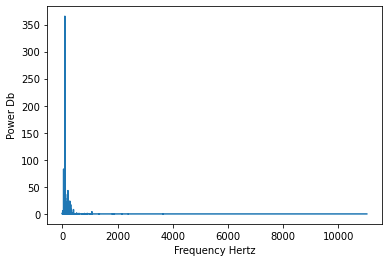

In [117]:
#plot PSD
PSD = fhat * np.conj(fhat)/len(x)
L = int(len(x)/2)
freqs = (1/(t[1]*len(t))) * np.arange(len(t))
plt.plot(freqs[0:L],PSD[0:L])
plt.xlabel('Frequency Hertz')
plt.ylabel('Power Db')

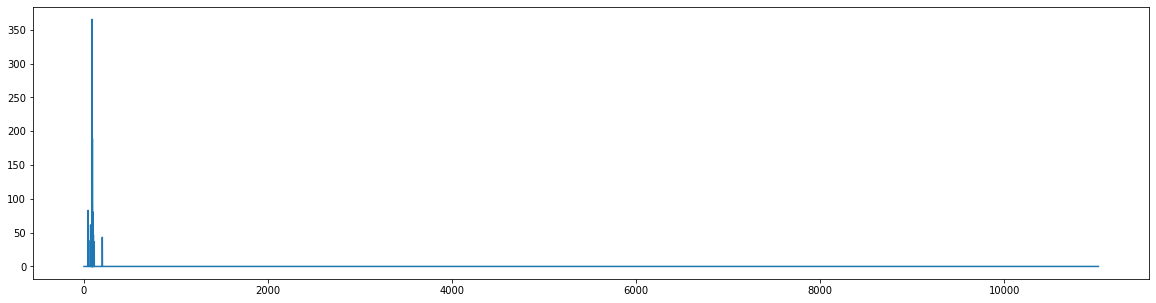

In [118]:
indices = PSD >30  #find dominant sound
PSDclean = PSD * indices #zero out all other
fhat = indices * fhat
# i = 0
# for indx in indices:
#     if(indx == False):
#         i = i+1
# print(i)
ffilt = np.fft.ifft(fhat)
plt.figure(figsize=(20,5))
plt.plot(freqs[0:L],PSDclean[0:L])



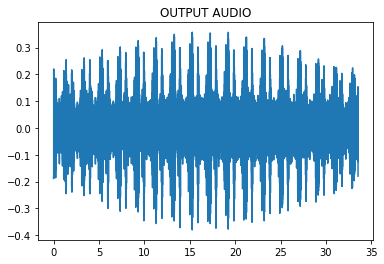

In [119]:
plt.title('OUTPUT AUDIO')
plt.plot(t,ffilt)


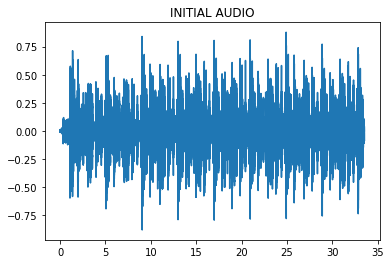

In [120]:
plt.title('INITIAL AUDIO')
plt.plot(t,x)

In [121]:
    #indeksy sub_bassowych czestotliwosc
    # print("\nThe len of sub_bass is equal to {}".format(len(sub_bass_indices)))
    # print("The length of audio is = {}".format(len(x)))
    # print("filtered sound is {:.1%} of the original".format(len(sub_bass_indices)/len(x)))
    # print("\nThe value of first five indices is = {}".format(sub_bass_indices[0:5]))
    # local_maximas = findLocalMaximaMinima(len(sub_bass_indices),sub_bass_indices)

In [122]:
    audio = [(idx,val) for idx,val in enumerate(x)]
    local_maximas = findLocalMaximaMinima(len(audio),audio)
    print("The length of audio is = {}".format(len(local_maximas)))


The length of audio is = 65726


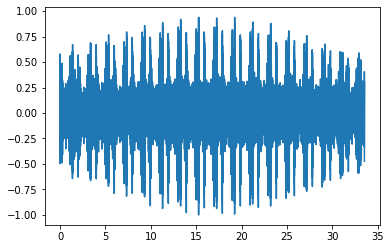

In [123]:
m = np.max(np.abs(ffilt))
sigf32 = (ffilt/m).astype(np.float32)
write("audio_output.wav", sr , sigf32)
plt.plot(t,sigf32)
